<div style="text-align:center; border: 2px solid #2E86C1; border-radius: 10px; padding: 30px; background-color: #F4F6F7;">

<h1 style="color:#154360; font-family:'Georgia', serif; font-size: 2.8em; margin-bottom: 20px;">APS106: Fundamentals of Computer Programming</h1>

<h2 style="color:#1A5276; font-family:'Palatino Linotype', 'Book Antiqua', serif; font-size: 2.0em; margin-bottom: 30px;">Tutorial 8, Week 9</h2>

<h3 style="color:#6C3483; font-family:'Cambria', serif; font-size: 1.8em; text-decoration: underline; margin-bottom: 15px;">Topics Covered</h3>
<p style="text-align:center; font-family:'Trebuchet MS', sans-serif; font-size: 1.3em; line-height: 1.8;">
  <span style="color:#D35400; font-weight:bold;">Programming Concepts (revisiting)</span><br>
  <span style="color:#283747;">• Object Types</span><br> 
  <span style="color:#283747;">• File I/O</span><br>
</p>

<h3 style="color:#6C3483; font-family:'Cambria', serif; font-size: 1.8em; text-decoration: underline; margin-bottom: 15px;">Goals for This Tutorial</h3>
<p style="text-align:center; font-family:'Verdana', sans-serif; font-size: 1.2em; line-height: 1.8;">
  <span style="color:#21618C;">• Understand how and when to use tuples, sets, and dictionaries.</span><br> 
  <span style="color:#21618C;">• Get familiar with operations and methods for various object types.</span><br> 
  <span style="color:#21618C;">• Learn how to read and write files, as well as process the information within them.</span><br>
</p>
</div>




### Today's Topics
1. [Object Types](#1types)
    - [Problem 1: Debug the Code!](#Problem-1)
    - [Problem 2: Travel Plans](#Problem-2)
    - [Problem 3: Counting Votes](#Problem-3)
    - [Problem 4: Finding Multipliable Numbers in a List](#Problem-4)
2. [File I/O](#2fileIO)
    - [Problem 5: Removing Duplicate Lines from a File](#Problem-5)
    - [Problem 6: Merging Grades for Two Classes](#Problem-6)

<a id='1types'></a>
## 1. Object Types


- Python provides various data structures, such as lists, tuples, sets, dictionaries, and strings
- Each data structure has distinct characteristics in terms of order and mutability
- These differences determine which methods/operations can be applied.

|        | **Ordered** | **Mutable** | **Iterable** |
|--------------------|----------------| | |
| **List**       | ✓ | ✓ | ✓ |
| **Tuple**     | ✓ | | ✓ |
| **Set** | | ✓ | ✓ |
| **Dictionaries** |  | ✓ | ✓ |
| **Strings** | ✓ | | ✓ |

In [11]:
_list = [0, 1, 2]
_tuple = (0, 1, 2)
_set = {0, 1, 2}
_dict = {'a': 0, 'b': 1, 'c': 2}
_str = "012"

_list[1] = 10 # works!
print(_list)

#_tuple[1] = 10 # error (immutable)
#TODO: create (0, 10, 2) from _tuple
_tuple = (_tuple[0],) + (10,) + (_tuple[2],)
print(_tuple)

#_set[1] = 10 # error (no ordering - indexing/slicing is impossible)
#TODO: update _set and make it {0, 10, 2}
_set.remove(1)
_set.add(10)
print(_set)

_dict[1] = 10 # works? (works but different from the expected behavior)
#TODO: update _dict to make it {'a': 0, 'b': 10, 'c': 2}
_dict['b'] = 10
print(_dict)

#_str[1] = 10 # error (immutable)
#TODO: create a string "0102"
_str = _str[0] + '10' + _str[2]
print(_str)

[0, 10, 2]
(0, 10, 2)
{0, 2, 10}
{'a': 0, 'b': 10, 'c': 2, 1: 10}
0102


<a id='Problem-1'></a>
### Problem 1: Debug the Code!


**Problem Statement**

- my_func(x) below takes an integer x and returns a tuple consisting a sequence of numbers from 0 to x, skipping every other number.
- However, the code causes an error and does not work.
- Fix the code and make it work!

In [ ]:
def my_func(x):
    # Take an integer x, and returns 
    # a tuple consisting a sequence of numbers from 0 to x, 
    # skipping every other number.
    
    data = ()
    for i in range(0, x+1, 2):
        data.append(i)
    
    return data

y = 10
my_data = my_func(y) # (0, 2, 4, 6, 8, 10)
print(my_data)

In [ ]:
def my_func(x):
    # Take an integer x, and returns 
    # a tuple consisting a sequence of numbers from 0 to x, 
    # skipping every other number.
    
    data = [] # Initialize as a list
    for i in range(0, x+1, 2):
        data.append(i)
    
    return tuple(data) # Convert it to a tuple before returning

y = 10
my_data = my_func(y) # (0, 2, 4, 6, 8, 10)
print(my_data)

In [17]:
def my_func(x):
    # Take an integer x, and returns 
    # a tuple consisting a sequence of numbers from 0 to x, 
    # skipping every other number.
    
    data = ()
    for i in range(0, x+1, 2):
        data = data + (i,) # Create a NEW tuple at each iteration
    
    return data

y = 10
my_data = my_func(y) # (0, 2, 4, 6, 8, 10)
print(my_data)

(0, 2, 4, 6, 8, 10)


<a id='Problem-2'></a>
### Problem 2: Travel Plans

A group of people have listed the countries they want to visit. The data is given as a list of tuples, where each tuple contains a person's name and a set of countries they wish to travel to.

For example:

```
travel_plans = [
    ("Alice", {"Japan", "France", "Canada"}),
    ("Bob", {"Canada", "Germany", "Japan", "France"}),
    ("Charlie", {"France", "Germany", "USA"}),
    ("David", {"USA", "France", "Japan"})]
```

Write a function `common_destinations(travel_plans)` that finds and returns the set of countries that all people want to visit.

Expected output:

```
{'France'}
```

In [48]:
travel_plans = [
    ("Alice", {"Japan", "France", "Canada"}),
    ("Bob", {"Canada", "Germany", "Japan", "France"}),
    ("Charlie", {"France", "Germany", "USA"}),
    ("David", {"USA", "France", "Japan"})
]

def common_destinations(travel_plans):
    if not travel_plans:
        return set()
    
    # Initialize a set with the first set of countries
    common = travel_plans[0][1]
    
    # Iterate over sets in the list, taking the intersection
    # between the intermediate result (common) and the i-th set
    for i in range(1, len(travel_plans)):
        common = common.intersection(travel_plans[i][1])
    
    return common

print(common_destinations(travel_plans))

{'France'}


In [50]:
travel_plans = [
    ("Alice", {"Japan", "France", "Canada"}),
    ("Bob", {"Canada", "Germany", "Japan", "France"}),
    ("Charlie", {"France", "Germany", "USA"}),
    ("David", {"USA", "France", "Japan"})
]

def common_destinations(travel_plans):
    if not travel_plans:
        return set()
    
    # Make a unique set of countries
    countries = []
    for plan in travel_plans:
        countries.extend(plan[1])
    countries = set(countries)
    
    # Iterate over countries, and add the country to 
    # another list 'common' if the country is included in
    # everyone's country list
    common = set()
    for c in countries:
        is_common = True # flag is True if the country is in everyone's list

        for plan in travel_plans:
            # If country c is not in the list, that means
            # c is not common to everyone's wish list
            if c not in plan[1]:
                # Turn the flag to False
                is_common = False
        
        # After checking everyone's wish list and the flag is still True,
        # then country c is common
        if is_common:
            common.add(c)
    
    return common

print(common_destinations(travel_plans))

{'Canada', 'Germany', 'USA', 'France', 'Japan'}
{'France'}


<a id='Problem-3'></a>
### Problem 3: Counting Votes

**Problem Statement**

In a class, students participated in a survey where they voted for their favorite fruit. The voting results are given as a list of strings, where each string represents a fruit that received a vote:

```
votes = ["Apple", "Banana", "Apple", "Orange", "Banana",
    "Apple", "Grape", "Orange", "Banana", "Apple"]
```

Write a function `maximum_votes(votes)` that returns the fruit that received the most votes.

Expected Output

```
"Apple"
```

Notes

- The list votes contains at least one vote.
- The fruit names are case-sensitive (e.g., "apple" and "Apple" are considered different).
- If there are multiple fruits having the same number of votes, pick the one that is the ealiest in the <b>alphabetical</b> order.

In [15]:
def count_votes(votes):
    vote_counts = {}

    for fruit in votes:
        if fruit in vote_counts:
            # If the fruit is already in vote_counts, 
            # then increment the count
            vote_counts[fruit] += 1
        else:
            # If the fruit appeared for the first time,
            # the count is set to 1
            vote_counts[fruit] = 1
    
    # Find the maximum votes
    max_fruit = votes[0] # Initialize the fruit name, will be updated later
    max_votes = 0

    for fruit in vote_counts:
        # If there is another fruit having the same votes as max_fruit,
        # alphabetically compare the fruit name 
        # with max_fruit (fruit < max_fruit)
        if vote_counts[fruit] > max_votes or \
            vote_counts[fruit] == max_votes and fruit < max_fruit:
            max_votes = vote_counts[fruit]
            max_fruit = fruit

    return max_fruit

# Test cases
votes = [
    "Apple", "Banana", "Apple", "Orange", "Banana",
    "Apple", "Grape", "Orange", "Banana", "Apple"
]
print(count_votes(votes)) # Apple

votes = [
    "Apple", "Orange", "Banana", "Orange", "Banana",
    "Apple", "Grape", "Orange", "Banana"
]
print(count_votes(votes)) # Banana (3 bananas and 3 oranges)

votes = [
    "Mango", "Banana", "Apple"]
print(count_votes(votes)) # Apple


Apple
Banana
Apple


In [1]:
def count_votes(votes):
    unique_fruits = list(set(votes)) # Create a list of unique fruits
    
    # Count the number of times each fruit appears in votes
    counts = []
    for fruit in unique_fruits:
        count = votes.count(fruit)
        counts.append(count)
    
    max_votes = max(counts) # Maximum number of votes

    # Get the index of the fruit that has the maximum votes
    # .index(value) returns the index of the first occurrence of value
    index = counts.index(max_votes)
    max_fruit = unique_fruits[index]

    # Check for tie-breaking 
    # (if there is another fruit having the same votes,
    # check their alphabetical orders)
    for i in range(len(unique_fruits)):
        if counts[i] == max_votes and \
            unique_fruits[i] < max_fruit:
            max_fruit = unique_fruits[i]
    
    return max_fruit

# Test cases
votes = [
    "Apple", "Banana", "Apple", "Orange", "Banana",
    "Apple", "Grape", "Orange", "Banana", "Apple"
]
print(count_votes(votes)) # Apple

votes = [
    "Apple", "Orange", "Banana", "Orange", "Banana",
    "Apple", "Grape", "Orange", "Banana"
]
print(count_votes(votes)) # Banana (3 bananas and 3 oranges)

votes = [
    "Mango", "Banana", "Apple"]
print(count_votes(votes)) # Apple


Apple
Banana
Apple


<a id='Problem-4'></a>
### Problem 4: Finding Multipliable Numbers in a List

You are given a list of integers. Your task is to identify and print any number in the list that can be expressed as the product of two different numbers from the same list. A number cannot be formed by multiplying itself with another number.

Example
Input:
```
numbers = [1, 3, 8, 10, 5, 2, 4]
```

Output:
```
8
10
```

- 8 is printed because there are 4 and 2 in the list.
- 10 is printed because there are 5 and 2 in the list.
- 4 is not printed because there is only one 2 in the list.
- 3 is not printed because you cannot use 3 itself in the equation (1 x 3 is not allowed).

Note:
- You can assume that there are <b>no duplicated numbers</b> in the input list. (e.g., there are no two 2s)

In [19]:
def find_multipliable_numbers(numbers):
    """
    Identifies and prints numbers in the list 
    that can be expressed as the product of two 
    different numbers from the same list.

    A number cannot be formed by multiplying itself with 
    another number.

    Parameters:
    numbers (list of int): A list of integers.

    """
    
    for num in numbers:
        is_print = False # Flag to track if the number should be printed

        for x in numbers:
            # Check if num is divisible by x
            if x != num and num % x == 0:
                # Calculate the other factor
                y = num // x
                
                # Ensure y is in the list and is not num itself or factor x
                if y in numbers and y != num and y != x:
                    is_print = True
        
        # If the flag is True after checking all numbers, print num
        if is_print:
            print(num)

# Example test cases:
numbers = [1, 3, 8, 10, 5, 2, 4]
find_multipliable_numbers(numbers) # 8, 10
print("")

numbers = [1, 2]
find_multipliable_numbers(numbers) # None
print("")

numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
find_multipliable_numbers(numbers) # 6, 8, 10
print("")

numbers = [-2, 4, -8]
find_multipliable_numbers(numbers) # -8

8
10


6
8
10

-8


## 2. File I/O


<a id='Section3b'></a>
### Writing to a File

A general syntax of writing to a file is as follows:

```
myfile = open("test.txt", "w")
myfile.write("My first file ...")
myfile.close()
```

<a id='Section3c'></a>
### Reading a File

The general syntax of reading a file object is summarized in the table below:

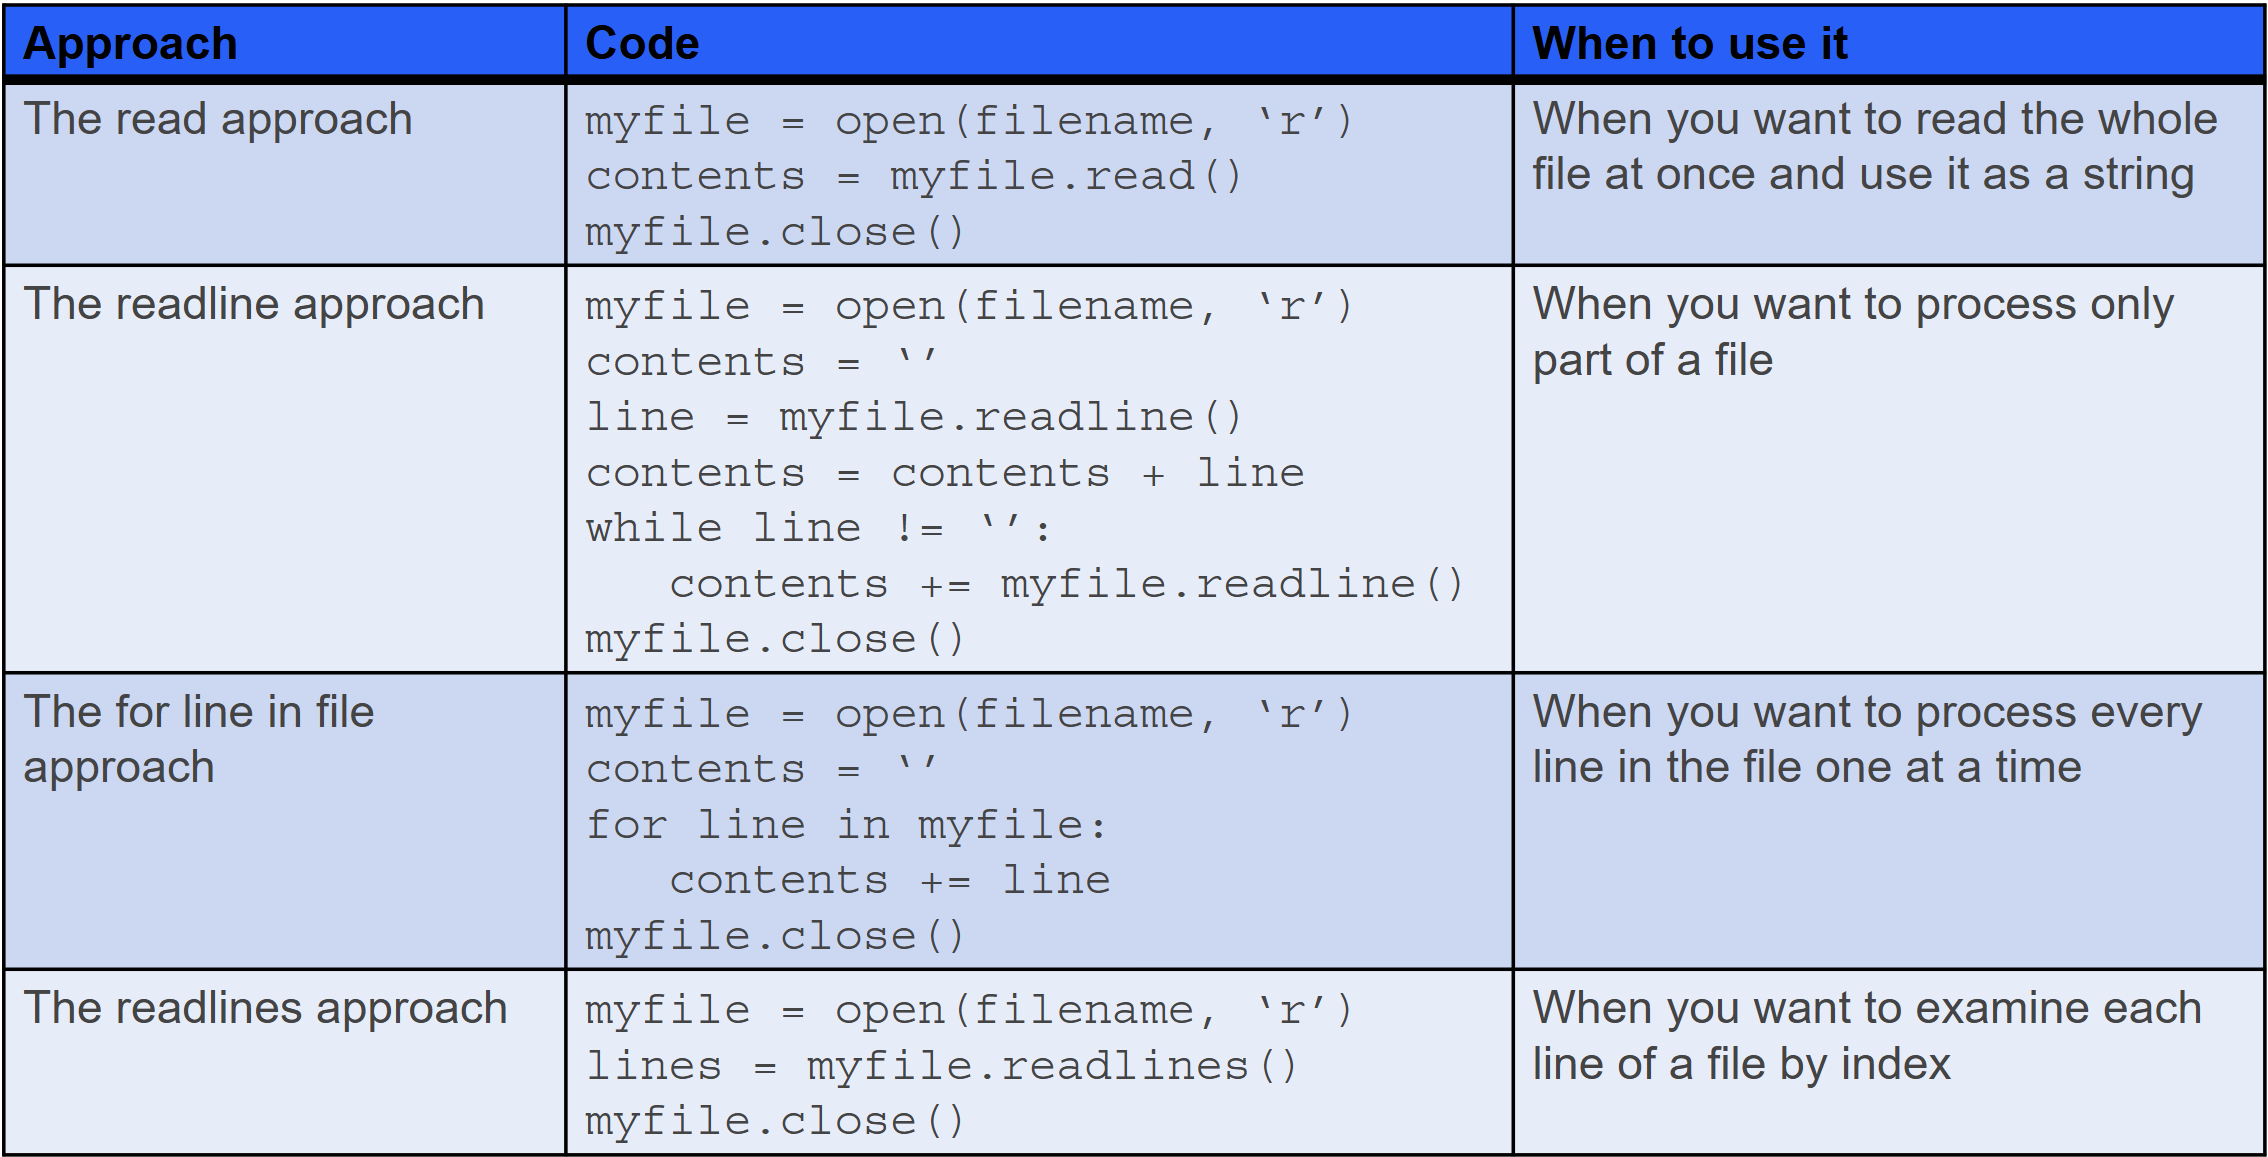

<a id='Problem-5'></a>
### Problem 5: Removing Duplicate Lines from a File

You are given a text file named `schedule.txt`, which may contain duplicate lines. Your task is to write a Python function `remove_duplicates(file_path)` that:

- Reads the file and identifies duplicate lines.
- Removes duplicates while preserving the original order of first occurrences.
- Overwrites the file with the cleaned content, ensuring no extra blank lines are added.

Example

Input File (`schedule.txt`):

```
Meeting at 10 AM  
Send the report  
Meeting at 10 AM  
Lunch break at 1 PM  
Send the report  
```

Expected Output (`schedule.txt` after processing):

```
Meeting at 10 AM  
Send the report  
Lunch break at 1 PM  
```

Notes

- The file may contain any number of lines.
- Whitespace at the start or end of a line should be ignored when checking for duplicates.
- You can use `str.strip()` method to truncate white spaces and the newline (`\n`) symbol in each line (e.g., `"   Meeting at 10AM\n".strip()` -> `"Meeting at 10AM"`).
- The function should not create additional files; it should modify schedule.txt in place.

In [ ]:
# To reset schedule.txt, run this code block
def make_file():
    with open("schedule.txt", "w") as file:
        file.write('Meeting at 10 AM' + "\n")
        file.write('Send the report' + "\n")
        file.write('Meeting at 10 AM' + "\n")
        file.write('Lunch break at 1 PM' + "\n")
        file.write('Send the report')
make_file()

In [6]:
def remove_duplicates(file_path):
    unique_lines = []

    # Read the file and filter out duplicates
    with open(file_path, "r") as file:
        for line in file:
            stripped_line = line.strip()  # Remove leading/trailing whitespace

            if stripped_line not in unique_lines:  # Check if it's a duplicate
                unique_lines.append(stripped_line)  # Maintain order

    # Write the unique lines back to the file
    with open(file_path, "w") as file:
        for line in unique_lines:
            file.write(line + "\n")  # Ensure there's a newline at the end
        
# Example usage:
remove_duplicates("schedule.txt")


<a id='Problem-6'></a>
### Problem 6: Merging Grades for Two Classes


**Problem Statement**

You are given two text files, `class1.txt` and `class2.txt`, each containing a list of students and their scores. Each line follows this format:

```
<Name1> <Score1>
<Name2> <Score2>
...
```

where `<Name>` is the student's name (a single word, no spaces), and `<Score>` is their grade (an integer between 0 and 100).

Your task is to write a function `merge_grades(class1_file, class2_file)` that:

- Reads the student records from both files.
- Merges the records into a single list.
- Sorts the list alphabetically by the student's name.
- Writes the sorted list into a new file, merged_grades.txt, maintaining the same format.

Example Input Files

`class1.txt`

```
Alice 85  
Charlie 78  
David 92  
```

`class2.txt`

```
Bob 88  
Eve 74  
Charlie 90  
```


Expected Output (`merged_grades.txt`)

```
Alice 85  
Bob 88  
Charlie 78  
Charlie 90  
David 92  
Eve 74
```

Notes:

- If a student appears in both files, their records should be included separately in the merged file (`Charlie` in the above example).
- You can use `str.strip()` method to truncate the newline (`\n`) symbol in each line (e.g., `"Alice 85\n".strip()` -> `"Alice 85"`).

In [ ]:
# To reset class1.txt and class2.txt, run this code block
def make_file():
    with open("class1.txt", "w") as file:
        file.write('Alice 85' + "\n")
        file.write('Charlie 78' + "\n")
        file.write('David 92')

    with open("class2.txt", "w") as file:
        file.write('Bob 88' + "\n")
        file.write('Eve 74' + "\n")
        file.write('Charlie 90')
make_file()

In [37]:
def merge_grades(class1_file, class2_file):
    records = []

    # Read data from both files
    with open(class1_file, "r") as file:
        for line in file:
            # Remove extra spaces or newline characters
            records.append(line.strip())

    with open(class2_file, "r") as file:
        for line in file:
            records.append(line.strip())
            
    # Sort records based on the extracted name
    records.sort()

    # Write the sorted records to the output file
    with open("merged_grades.txt", "w") as file:
        for record in records:
            file.write(record + "\n")  # Ensure there's a newline at the end

# Example usage:
merge_grades("class1.txt", "class2.txt")
